In [1]:
pip install faker

Note: you may need to restart the kernel to use updated packages.


# Importing standard libraries

In [3]:
from faker import Faker
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df1 = Faker()

### Creating name column with Faker

In [6]:
def create_names(n):
   name = []
   for _ in range(0, n):
        name.append(df1.name())
   return name

In [7]:
name = create_names(362806)

In [8]:
df_name = pd.DataFrame(list(zip(name)),columns = ['Name'])

In [9]:
df_name.head()

,Name
0,Cameron Martin
1,Whitney Parker
2,Brittany Green
3,Willie Munoz
4,Krystal Barrett DVM


In [10]:
df_name.shape

(362806, 1)

### Creating race column

In [12]:
def weighted_cartesian_choice(*iterables):
    # An arbitrary number of tuple or lists,each consisting of population and weights.weighted_cartesian_choice returns a list 
    #with a chocie from each population
    
    res = []
    for population, weights in iterables:
     #normalize weight:
        weights = np.array(weights) / sum(weights)
        lst = np.random.choice(population, p=weights)
        res.append(lst)
    return res
race = (['White','Hispanic', 'Black','Asian'], 
        [.32,.28,.22,.18])

list=[]
for i in range(362806):
    res = weighted_cartesian_choice(race)
    list.append(res)

In [13]:
df_race=pd.DataFrame(list, columns = ['Race'])

In [14]:
df_race.head()

,Race
0,Asian
1,White
2,Hispanic
3,Asian
4,Asian


### Concatenating name and race columns

In [16]:
df_nr = pd.concat([df_name, df_race], axis=1).reindex(df_race.index)

In [17]:
df_drugs = pd.read_csv('webmd.csv')

### Creating the final dataset 

In [20]:
data_drugs = pd.concat([df_nr, df_drugs], axis=1).reindex(df_drugs.index)

In [21]:
data_drugs.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Cameron Martin,Asian,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Whitney Parker,White,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Brittany Green,Hispanic,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Willie Munoz,Asian,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Krystal Barrett DVM,Asian,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


### Converting the dataframe to csv file

In [23]:
data_drugs = data_drugs.to_csv('dataset_drugs.csv', index=False)

### Loading the dataset

In [25]:
data = pd.read_csv('dataset_drugs.csv')

In [26]:
data.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Cameron Martin,Asian,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Whitney Parker,White,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Brittany Green,Hispanic,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Willie Munoz,Asian,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Krystal Barrett DVM,Asian,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


## Description of the dataset

Name : Name of the patient
    
Race : Race of the patient
    
Age : Age of the patient

Condition : Condition/symptom from which the patient is suffering

Date : Date of usage

Drug : Name of the drug

DrugId : Identity/code of drug

EaseofUse : Patient's 10-Star rating on the ease of use of drug

Effectiveness : Patient's 10-Star rating on the effectiveness of drug

Reviews : Patient's review

Satisfaction : Patient's 10-Star rating on satisfaction

Sex : Gender of the patient

Sides : Side effects of the drug

UsefulCount : Number of users who found the review useful

# Data exploration

In [29]:
data.head

<bound method NDFrame.head of                        Name      Race         Age      Condition        Date  \
0            Cameron Martin     Asian  75 or over    Stuffy Nose   9/21/2014   
1            Whitney Parker     White       25-34  Cold Symptoms   1/13/2011   
2            Brittany Green  Hispanic       65-74          Other   7/16/2012   
3              Willie Munoz     Asian  75 or over          Other   9/23/2010   
4       Krystal Barrett DVM     Asian       35-44          Other    1/6/2009   
...                     ...       ...         ...            ...         ...   
362801       Robert Burnett     White       55-64   Stop Smoking  11/14/2008   
362802           Erik Floyd     Black                      Other  11/14/2008   
362803        Jasmine White     White       25-34   Stop Smoking  11/13/2008   
362804       Michael Howard     Asian       55-64   Stop Smoking  11/13/2008   
362805          John Mosley  Hispanic       45-54   Stop Smoking  11/12/2008   

         

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362806 non-null  object
 1   Race           362806 non-null  object
 2   Age            362806 non-null  object
 3   Condition      362806 non-null  object
 4   Date           362806 non-null  object
 5   Drug           362806 non-null  object
 6   DrugId         362806 non-null  int64 
 7   EaseofUse      362806 non-null  int64 
 8   Effectiveness  362806 non-null  int64 
 9   Reviews        362763 non-null  object
 10  Satisfaction   362806 non-null  int64 
 11  Sex            362806 non-null  object
 12  Sides          362806 non-null  object
 13  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


In [34]:
data.shape

(362806, 14)

In [52]:
data.isnull().any()

Name             False
Race             False
Age              False
Condition        False
Date             False
Drug             False
DrugId           False
EaseofUse        False
Effectiveness    False
Reviews           True
Satisfaction     False
Sex              False
Sides            False
UsefulCount      False
dtype: bool

In [53]:
data.isna().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          43
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [55]:
data.dtypes

Name             object
Race             object
Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

### Descriptive statistics

In [59]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
DrugId,362806.0,36879.370774,52624.412971,1.0,4896.0,9548.0,63522.0,178546.0
EaseofUse,362806.0,4.019829,1.317711,1.0,3.0,5.0,5.0,10.0
Effectiveness,362806.0,3.532061,1.455961,1.0,3.0,4.0,5.0,10.0
Satisfaction,362806.0,3.135408,1.611106,1.0,1.0,3.0,5.0,10.0
UsefulCount,362806.0,6.744916,9.324240,0.0,1.0,4.0,9.0,255.0


### Summary statistics - object datatype

In [64]:
data.describe(include='object').T

,count,unique,top,freq
Name,362806,180994,Michael Smith,181
Race,362806,4,White,116003
Age,362806,12,45-54,80043
Condition,362806,1806,Other,49765
Date,362806,4524,10/29/2007,404
Drug,362806,7093,cymbalta,4648
Reviews,362763,250166,,41824
Sex,362806,3,Female,238226
Sides,362806,1651,,17460


### Checking for duplicate values

In [66]:
data.duplicated().sum()

0

### Exploring the column names

In [68]:
data.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

### Unique occurrences of each variable

In [70]:
for i in data.columns:
    print(i,':',data[i].nunique(),'\n')

Name : 180994 

Race : 4 

Age : 12 

Condition : 1806 

Date : 4524 

Drug : 7093 

DrugId : 6572 

EaseofUse : 7 

Effectiveness : 7 

Reviews : 250166 

Satisfaction : 7 

Sex : 3 

Sides : 1651 

UsefulCount : 148 



### Creating the list of categorical variables

In [73]:
cat_var = []

for column in data:
    if data[column].dtype == 'O':
        cat_var.append(column)
cat_var

['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'Reviews', 'Sex', 'Sides']

In [74]:
# finding the unique values in each categorical variables
for col in cat_var:
    print('\n', col, '\n', data[col].unique(), '\n', '_' * 80)


 Name 
 ['Cameron Martin' 'Whitney Parker' 'Brittany Green' ... 'Keith Adkins'
 'Kristen Barnes DDS' 'Erik Floyd'] 
 ________________________________________________________________________________

 Race 
 ['Asian' 'White' 'Hispanic' 'Black'] 
 ________________________________________________________________________________

 Age 
 ['75 or over' '25-34' '65-74' '35-44' '55-64' '45-54' '19-24' ' ' '13-18'
 '7-12' '0-2' '3-6'] 
 ________________________________________________________________________________

 Condition 
 ['Stuffy Nose' 'Cold Symptoms' 'Other' ...
 'Combative and Explosive Behavior' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance'] 
 ________________________________________________________________________________

 Date 
 ['9/21/2014' '1/13/2011' '7/16/2012' ... '10/25/2019' '6/22/2019'
 '10/19/2019'] 
 ________________________________________________________________________________

 Drug 
 ['25dph-7.5peh' 'warfarin (bulk) 100 % powder' 'wymzya fe' ...
 

In [75]:
data.Name.value_counts()

Name
Michael Smith      181
David Smith        119
Michael Johnson    118
John Smith         116
James Smith        115
                  ... 
Brett Clay           1
Robert Booth         1
Theodore Bright      1
Erika Hardy          1
Erik Floyd           1
Name: count, Length: 180994, dtype: int64

In [76]:
data.Race.value_counts()

Race
White       116003
Hispanic    101457
Black        79906
Asian        65440
Name: count, dtype: int64

In [77]:
data.Age.value_counts()

Age
45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
              12202
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: count, dtype: int64

In [79]:
data.Date.value_counts()

Date
10/29/2007    404
10/30/2007    316
10/28/2007    315
3/15/2010     308
3/16/2010     295
             ... 
10/19/2019      2
10/27/2019      1
10/20/2019      1
6/28/2019       1
6/22/2019       1
Name: count, Length: 4524, dtype: int64

In [81]:
data.Drug.value_counts()

Drug
cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: count, Length: 7093, dtype: int64

In [82]:
data.DrugId.value_counts()

DrugId
6873      8538
1025      7868
6007      7728
4398      5864
14208     5451
          ... 
4118         1
165948       1
54215        1
154021       1
149247       1
Name: count, Length: 6572, dtype: int64

In [83]:
data.EaseofUse.value_counts()

EaseofUse
5     192650
4      74732
3      41303
1      35927
2      18191
6          2
10         1
Name: count, dtype: int64

In [84]:
data.Effectiveness.value_counts()

Effectiveness
5     130388
4      81821
3      60406
1      59387
2      30801
6          2
10         1
Name: count, dtype: int64

In [85]:
data.Reviews.value_counts()

Reviews
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           41824
good                                                                                                                                                                                                                                                                                                                                           

In [87]:
data.Satisfaction.value_counts()

Satisfaction
5     111550
1     100901
4      63158
3      51852
2      35342
6          2
10         1
Name: count, dtype: int64

In [88]:
data.Sex.value_counts()

Sex
Female    238226
Male       98043
           26537
Name: count, dtype: int64

In [90]:
data.Sides.value_counts()

Sides
                                                                                                                                                       17460
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                          15563
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.       12116
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                 9162
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.              7790
                                                                                                                                                       ...  
Nausea ,  vomiting ,  stomach / abdominal pain , gas

In [91]:
data.UsefulCount.value_counts()

UsefulCount
0      71608
1      46240
2      34701
3      27307
4      22862
       ...  
136        1
178        1
176        1
169        1
95         1
Name: count, Length: 148, dtype: int64

In [92]:
data.Condition.value_counts()

Condition
Other                                                  49765
Pain                                                   25232
High Blood Pressure                                    23275
Depression                                             14509
Birth Control                                          12253
                                                       ...  
Diagnostic Test for Myasthenia Gravis                      1
Myelodysplastic Syndrome with 5q Deletion Gene Type        1
Hunter Syndrome                                            1
Increased Uric Acid due to Cancer Chemotherapy             1
Adverse Effect of Benzodiazepine-Based Tranquilizer        1
Name: count, Length: 1806, dtype: int64

In [93]:
data.Drug.value_counts().head(20)

Drug
cymbalta                                               4648
lisinopril                                             4269
lisinopril solution                                    4269
lexapro                                                4134
hydrocodone-acetaminophen                              3944
effexor xr                                             3486
lyrica                                                 3069
tramadol hcl er                                        2932
tramadol hcl                                           2932
zoloft                                                 2662
prednisone tablet, delayed release (enteric coated)    2576
prednisone concentrate                                 2576
prednisone                                             2576
seroquel                                               2446
phentermine hcl                                        2367
celexa                                                 2224
topamax                            

## Selection of drug: A particular drug named Topamax with DrugId 14494 is selected in building a classification model to determine side effects

In [96]:
drug_topamax= data.loc[(data['Drug'] =='topamax')]
drug_topamax.head(5)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
191568,Alison Turner,Hispanic,45-54,Migraine Prevention,9/22/2019,topamax,14494,4,4,"I was on this drug for 5 years, 100mg for the ...",1,,"Tiredness, drowsiness, dizziness , loss of co...",5
191575,Patricia Martin,Asian,35-44,Simple Partial Seizures,9/2/2019,topamax,14494,4,4,I have partial seizures. It didn't help for a ...,4,,"Tiredness, drowsiness, dizziness , loss of co...",0
191582,Heather Medina,Asian,13-18,Migraine Prevention,8/9/2019,topamax,14494,1,1,I have been having migraines and headaches eve...,1,,"Tiredness, drowsiness, dizziness , loss of co...",6
191589,Christopher Branch,White,65-74,Essential Tremor,7/21/2019,topamax,14494,4,4,This is the only medication I have taken for t...,3,,"Tiredness, drowsiness, dizziness , loss of co...",0
191596,John Mullins,White,45-54,Migraine Prevention,4/30/2019,topamax,14494,5,5,I suffered from debilitating Cluster Headaches...,5,,"Tiredness, drowsiness, dizziness , loss of co...",2


In [97]:
drug_topamax.shape

(2148, 14)

In [101]:
drug_topamax['Condition'].value_counts()

Condition
Migraine Prevention                                1380
Other                                               460
Simple Partial Seizures                              68
Convulsive Seizures                                  63
Tonic-Clonic Epilepsy                                48
Additional Medication to Treat Partial Seizures      48
Habit of Drinking Too Much Alcohol                   27
Essential Tremor                                     24
Additional Medication for Tonic-Clonic Epilepsy      15
Involuntary Quivering                                10
Epilepsy of the Lennox Gastaut Syndrome               4
Binge Eating Disorder                                 1
Name: count, dtype: int64

In [103]:
drug_topamax['Condition'].value_counts().sum()

2148

In [105]:
data_new = drug_topamax.copy()

In [109]:
data_copy = data.copy()

# Data pre-processing

## 1. Handling whitespaces

In [114]:
# Handling instances with whitespaces
for i in data_new:
    data_new[i]=np.where(data_new[i]==" ",np.NAN,data_new[i])

In [116]:
data_new.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
191568,Alison Turner,Hispanic,45-54,Migraine Prevention,9/22/2019,topamax,14494.0,4.0,4.0,"I was on this drug for 5 years, 100mg for the ...",1.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",5.0
191575,Patricia Martin,Asian,35-44,Simple Partial Seizures,9/2/2019,topamax,14494.0,4.0,4.0,I have partial seizures. It didn't help for a ...,4.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",0.0
191582,Heather Medina,Asian,13-18,Migraine Prevention,8/9/2019,topamax,14494.0,1.0,1.0,I have been having migraines and headaches eve...,1.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",6.0
191589,Christopher Branch,White,65-74,Essential Tremor,7/21/2019,topamax,14494.0,4.0,4.0,This is the only medication I have taken for t...,3.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",0.0
191596,John Mullins,White,45-54,Migraine Prevention,4/30/2019,topamax,14494.0,5.0,5.0,I suffered from debilitating Cluster Headaches...,5.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",2.0


## 2. Missing values

In [122]:
#checking missing values
data_new.isnull().sum()

Name               0
Race               0
Age               75
Condition          0
Date               0
Drug               0
DrugId             0
EaseofUse          0
Effectiveness      0
Reviews          200
Satisfaction       0
Sex              103
Sides              0
UsefulCount        0
dtype: int64

In [125]:
data_new.shape

(2148, 14)

### Bar plot showing the null value count of each feature

Text(0.5, 1.0, 'Total Missing Values')

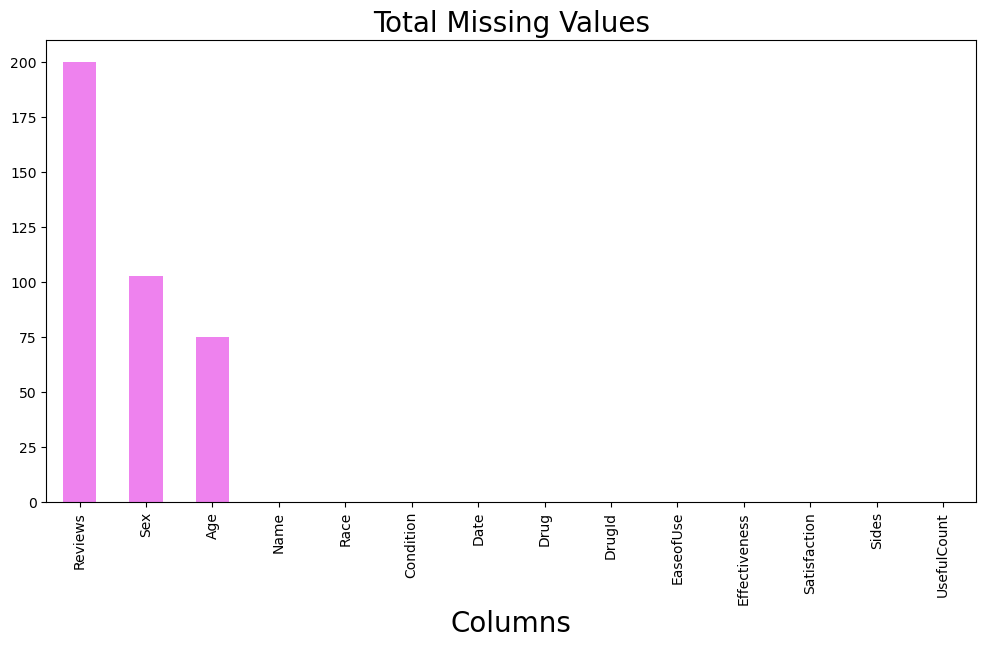

In [127]:
missing = (data_new.isnull().sum()).sort_values(ascending=False)
missing.plot(kind="bar", figsize = (12,6), fontsize = 10, color='violet')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [130]:
# Removing rows with null data
data_new=data_new.dropna(axis=0)

In [132]:
data_new.isnull().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [133]:
data_new.shape

(1830, 14)

## 3.Text processing

In [136]:
# converting rows having data other than string datatype into  string.
for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Sides']) != str:
        data_new.iloc[i]['Sides'] = str(data_new.iloc[i]['Sides'])

for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Reviews']) != str:
        data_new.iloc[i]['Reviews'] = str(data_new.iloc[i]['Reviews'])
        
for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Condition']) != str:
        data_new.iloc[i]['Condition'] = str(data_new.iloc[i]['Condition'])

In [138]:
import re
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower()
    i = re.sub("[0-9" "]+"," ",i)
    i= re.sub("[\W+""]", " ",i)        
    w = []
    for word in i.split(" "):
        if len(word)>3:
            w.append(word)
    return (" ".join(w))

### 3.1 Sides

In [141]:
data_new.Sides= data_new.Sides.apply(cleaning_text)
data_new.Sides

191610    tiredness drowsiness dizziness loss coordinati...
191624    tiredness drowsiness dizziness loss coordinati...
191631    tiredness drowsiness dizziness loss coordinati...
191638    tiredness drowsiness dizziness loss coordinati...
191645    tiredness drowsiness dizziness loss coordinati...
                                ...                        
197200    tiredness drowsiness dizziness loss coordinati...
197201    tiredness drowsiness dizziness loss coordinati...
197202    tiredness drowsiness dizziness loss coordinati...
197203    tiredness drowsiness dizziness loss coordinati...
197204    tiredness drowsiness dizziness loss coordinati...
Name: Sides, Length: 1830, dtype: object

In [142]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data_new['Sides'] = data_new['Sides'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhate\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [143]:
data_new['Sides']

191610    tiredness drowsiness dizziness loss coordinati...
191624    tiredness drowsiness dizziness loss coordinati...
191631    tiredness drowsiness dizziness loss coordinati...
191638    tiredness drowsiness dizziness loss coordinati...
191645    tiredness drowsiness dizziness loss coordinati...
                                ...                        
197200    tiredness drowsiness dizziness loss coordinati...
197201    tiredness drowsiness dizziness loss coordinati...
197202    tiredness drowsiness dizziness loss coordinati...
197203    tiredness drowsiness dizziness loss coordinati...
197204    tiredness drowsiness dizziness loss coordinati...
Name: Sides, Length: 1830, dtype: object

### 3.2 Reviews

In [146]:
data_new.review= data_new.Reviews.apply(cleaning_text)
data_new.review

191610    years when this medication when mild seizure n...
191624    topamax chronic vomiting only took weeks befor...
191631    taking gabapentin central neuropathy wondering...
191638    have been taking topamax exactly four years mi...
191645    suffer with spinal degeneration that supposed ...
                                ...                        
197200    first weeks felt great took ptsd symptoms away...
197201    have tried just about everything there help wi...
197202    have rash around neck after started taking top...
197203    have read some reviews happy realize that goin...
197204    topamax worked great until started have short ...
Name: Reviews, Length: 1830, dtype: object

### Removing stopwords

In [149]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data_new['Reviews'] = data_new['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhate\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [150]:
data_new['Reviews']

191610    I'm 30 years old, I 12 I put medication. When ...
191624    I put 50mg day topamax chronic vomiting. I too...
191631    I'm taking Gabapentin Central Neuropathy!! I w...
191638    I taking Topamax exactly four years migraine p...
191645    I suffer spinal degeneration I supposed daily ...
                                ...                        
197200    The first 3 weeks I felt great---it took lot P...
197201    I tried everything help migrianes. Nothing wor...
197202    I rash around neck I started taking Topamax. I...
197203    I read reviews happy realize "I" going crazy a...
197204    Topamax worked great, I started short term mem...
Name: Reviews, Length: 1830, dtype: object

### 3.3 Condition

In [152]:
data_new.Condition=data_new.Condition.apply(cleaning_text)
data_new.Condition

191610    simple partial seizures
191624                      other
191631                      other
191638        migraine prevention
191645                      other
                   ...           
197200                      other
197201        migraine prevention
197202                      other
197203    simple partial seizures
197204        migraine prevention
Name: Condition, Length: 1830, dtype: object

## 4. Gender

In [155]:
data_new['Sex'].value_counts()

Sex
Female    1669
Male       161
Name: count, dtype: int64

## 5.Handling age group

In [160]:
data_new['Age'].value_counts()

Age
45-54         463
35-44         455
25-34         423
55-64         196
19-24         184
13-18          51
65-74          37
7-12            8
75 or over      8
3-6             3
0-2             2
Name: count, dtype: int64

In [161]:
data_new['Age'].unique()

array(['7-12', '25-34', '45-54', '65-74', '55-64', '35-44', '19-24',
       '13-18', '75 or over', '3-6', '0-2'], dtype=object)

In [162]:
data_new['Age']=data_new['Age'].str.replace('75 or over','75-100')

In [163]:
data_new['Age'].value_counts()

Age
45-54     463
35-44     455
25-34     423
55-64     196
19-24     184
13-18      51
65-74      37
7-12        8
75-100      8
3-6         3
0-2         2
Name: count, dtype: int64

## 6.Outliers detection

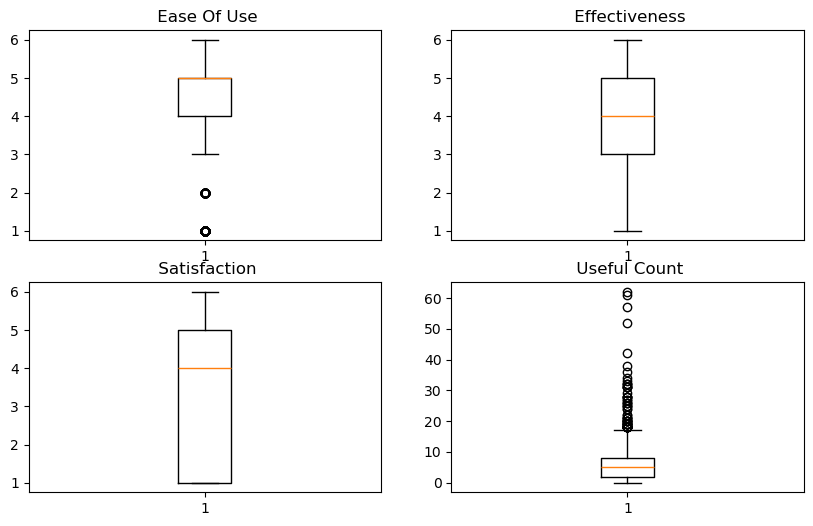

In [165]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_new["EaseofUse"])
plt.title(" Ease Of Use")

plt.subplot(2,2,2)
plt.boxplot(data_new["Effectiveness"])
plt.title(" Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data_new["Satisfaction"])
plt.title(" Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(data_new["UsefulCount"])
plt.title(" Useful Count")
plt.show()

## Removing outliers

In [169]:
# define a function called 'outliers' which returns a list of outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
#create list to store indexes of outliers
    ls= df.index[(df[ft]<lower) | (df[ft]>upper)]
    return ls

In [170]:
#create an empty list to store indexes from multiple columns
index_list=[]
for feature in ['UsefulCount', 'EaseofUse']:
    index_list.extend(outliers(data_new,feature))
index_list

[191785,
 191911,
 191925,
 191939,
 192009,
 192016,
 192023,
 192030,
 192058,
 192275,
 192317,
 192492,
 192888,
 193037,
 193082,
 193286,
 193316,
 193319,
 193337,
 193340,
 193472,
 193502,
 193505,
 193508,
 193520,
 193535,
 193571,
 194130,
 194146,
 194264,
 194282,
 194300,
 194336,
 194344,
 194390,
 194496,
 194740,
 194818,
 194890,
 194914,
 194946,
 195358,
 195382,
 195420,
 195448,
 195494,
 195526,
 195940,
 195988,
 196040,
 196076,
 196134,
 196162,
 196340,
 196400,
 196410,
 196510,
 196756,
 196774,
 197000,
 197184,
 197188,
 197198,
 191624,
 191631,
 191757,
 191862,
 191911,
 191939,
 192128,
 192135,
 192142,
 192163,
 192219,
 192226,
 192289,
 192303,
 192317,
 192324,
 192457,
 192485,
 192499,
 192527,
 192548,
 192674,
 192737,
 192779,
 192800,
 192929,
 192959,
 192965,
 193022,
 193025,
 193031,
 193055,
 193085,
 193118,
 193124,
 193151,
 193178,
 193274,
 193331,
 193352,
 193394,
 193436,
 193445,
 193514,
 193517,
 193586,
 193607,
 193616,
 

In [171]:
#define a function called 'remove' which returns a cleaned data without outliers
def remove(df,ls):
    ls=sorted(set(ls)) #to sort and remove multiple copies(to get unique)
    df=df.drop(ls)
    return df

In [172]:
data_new.shape

(1830, 14)

In [174]:
data_new=remove(data_new,index_list)

In [175]:
data_new.shape

(1548, 14)

## UsefulCount and EasofUse columns post outliers removal

Text(0.5, 1.0, 'Box plot of Useful Count')

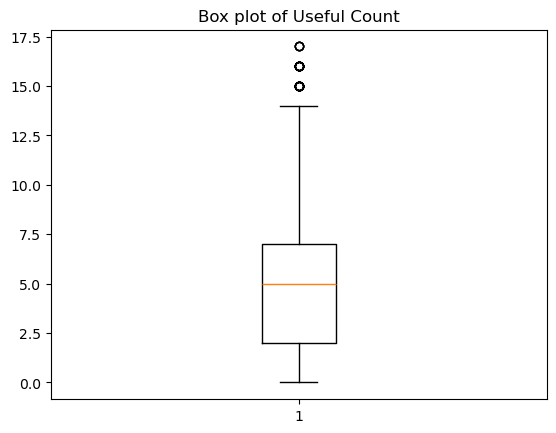

In [177]:
plt.boxplot(data_new["UsefulCount"])
plt.title('Box plot of Useful Count')

Text(0.5, 1.0, 'Box plot of Ease Of Use')

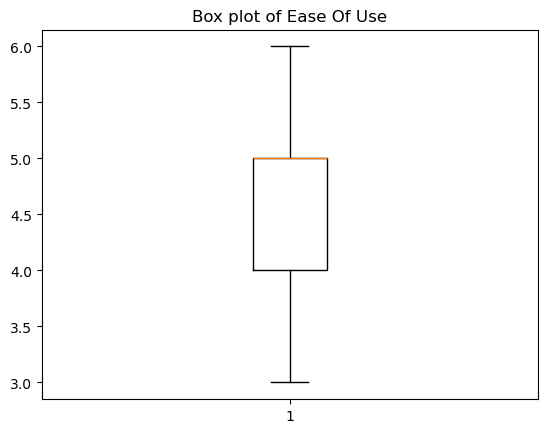

In [178]:
plt.boxplot(data_new["EaseofUse"])
plt.title('Box plot of Ease Of Use')

### Satisfaction column

In [180]:
data_new['Satisfaction'].value_counts()

Satisfaction
5.0    545
4.0    334
1.0    309
3.0    229
2.0    130
6.0      1
Name: count, dtype: int64

In [181]:
data_new[data_new['Satisfaction'] > 5]

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
195282,John Hart,White,35-44,migraine prevention,5/18/2009,topamax,14494.0,6.0,6.0,ahoj som zo slovenska dlhe roky mam migreny tu...,6.0,Female,tiredness drowsiness dizziness loss coordinati...,0.0


### Deleting values greater than 5 from Satisfaction column

In [183]:
data_new.drop(labels = data_new[data_new['Satisfaction'] == 6].index, axis = 0, inplace = True)
data_new[data_new['Satisfaction'] == 6]

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount


## 7. Feature engineering

### Creation of a new SideEffects column

In [186]:
data1=np.where(data_new['Satisfaction'] == 1.0, "Nil", data_new['Satisfaction'])
data1=np.where(data_new['Satisfaction'] == 2.0, "Mild",data1)
data1=np.where(data_new['Satisfaction'] == 3.0, "Moderate", data1)
data1=np.where(data_new['Satisfaction'] == 4.0, "Severe", data1)
data1=np.where(data_new['Satisfaction'] == 5.0, "Extreme",data1)

In [187]:
data_new['SideEffects']=data1

### Since DrugId is the same, dropping the column

In [189]:
data_new.drop(['Satisfaction','DrugId'], inplace=True, axis=1)

In [190]:
data_new.head()

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,Sex,Sides,UsefulCount,SideEffects
191610,Clarence Ortega,Hispanic,7-12,simple partial seizures,2/26/2019,topamax,4.0,5.0,"I'm 30 years old, I 12 I put medication. When ...",Male,tiredness drowsiness dizziness loss coordinati...,0.0,Extreme
191638,Cynthia Freeman,White,65-74,migraine prevention,6/22/2014,topamax,5.0,5.0,I taking Topamax exactly four years migraine p...,Female,tiredness drowsiness dizziness loss coordinati...,9.0,Extreme
191645,Duane Diaz,Black,55-64,other,12/27/2018,topamax,5.0,5.0,I suffer spinal degeneration I supposed daily ...,Female,tiredness drowsiness dizziness loss coordinati...,0.0,Extreme
191652,Matthew Morgan,Hispanic,45-54,migraine prevention,12/17/2018,topamax,5.0,3.0,I taking 50 mg 2x day since 11/30/18. The firs...,Female,tiredness drowsiness dizziness loss coordinati...,7.0,Mild
191659,Margaret Higgins,White,25-34,tonic clonic epilepsy,10/18/2018,topamax,5.0,5.0,The important thin I want say Topamax medicine...,Male,tiredness drowsiness dizziness loss coordinati...,1.0,Extreme


In [191]:
#data_new.to_csv('drug_topamax_eda.csv', index=False)

In [192]:
data_copy = data_new.copy()

## 8. Feature reduction

### Correlation analysis

#### Correlation matrix is plotted to check the relationship between variables

<Axes: >

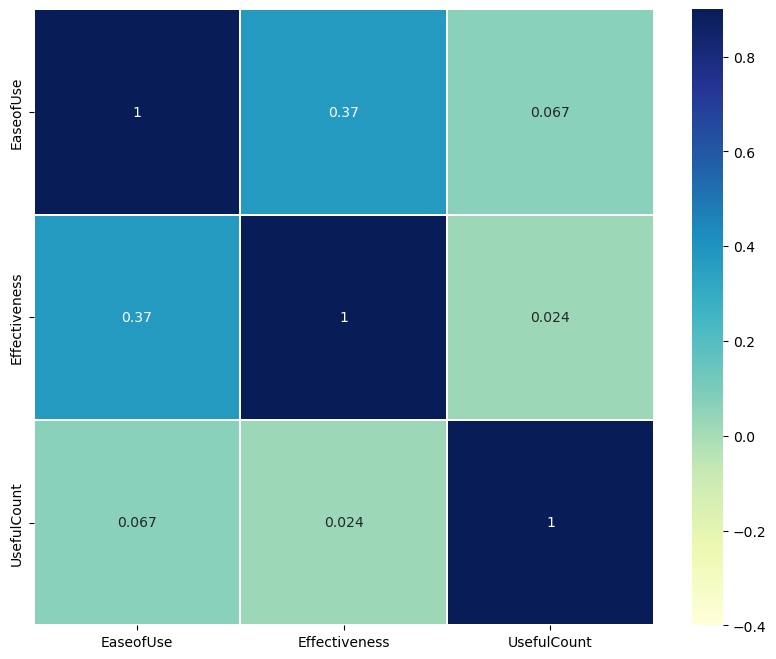

In [198]:
corrmatrix = data_new.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

## Here, being common, dropped the Drug, Sides columns. The other columns such as Date, Name, Reviews and UsefulCount are also dropped since these doesn't deal with side effects of the drug.

In [200]:
data_new=data_new.drop(columns = ['Name','Drug','Date','Sides','Reviews','UsefulCount'],axis=1)
data_new=data_new.reset_index(drop=True)
data_new.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,Hispanic,7-12,simple partial seizures,4.0,5.0,Male,Extreme
1,White,65-74,migraine prevention,5.0,5.0,Female,Extreme
2,Black,55-64,other,5.0,5.0,Female,Extreme
3,Hispanic,45-54,migraine prevention,5.0,3.0,Female,Mild
4,White,25-34,tonic clonic epilepsy,5.0,5.0,Male,Extreme


In [201]:
data_new.shape

(1547, 7)

## 9. Encoding

In [204]:
#Finding categorical columns and chnaging datatype
for cl in data_new.select_dtypes(include = ['object']):
    data_new[cl]=data_new[cl].astype('category')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Race           1547 non-null   category
 1   Age            1547 non-null   category
 2   Condition      1547 non-null   category
 3   EaseofUse      1547 non-null   float64 
 4   Effectiveness  1547 non-null   float64 
 5   Sex            1547 non-null   category
 6   SideEffects    1547 non-null   category
dtypes: category(5), float64(2)
memory usage: 33.1 KB


In [205]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [206]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Race           1547 non-null   category
 1   Age            1547 non-null   category
 2   Condition      1547 non-null   category
 3   EaseofUse      1547 non-null   float64 
 4   Effectiveness  1547 non-null   float64 
 5   Sex            1547 non-null   category
 6   SideEffects    1547 non-null   category
dtypes: category(5), float64(2)
memory usage: 33.1 KB


In [207]:
data_new.columns

Index(['Race', 'Age', 'Condition', 'EaseofUse', 'Effectiveness', 'Sex',
       'SideEffects'],
      dtype='object')

In [209]:
data_new.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,Hispanic,7-12,simple partial seizures,4.0,5.0,Male,Extreme
1,White,65-74,migraine prevention,5.0,5.0,Female,Extreme
2,Black,55-64,other,5.0,5.0,Female,Extreme
3,Hispanic,45-54,migraine prevention,5.0,3.0,Female,Mild
4,White,25-34,tonic clonic epilepsy,5.0,5.0,Male,Extreme


In [212]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
#for col in ['SideEffects', 'Drug','Age','Sex']:
for col in ['Race','Age','Sex','Condition','SideEffects']:   
    data_new[col]=label.fit_transform((data_new[col]).astype(str))
    
data_label=data_new

In [213]:
data_new.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,2,9,10,4.0,5.0,1,0
1,3,8,8,5.0,5.0,0,0
2,1,7,9,5.0,5.0,0,0
3,2,6,8,5.0,3.0,0,1
4,3,3,11,5.0,5.0,1,0


In [215]:
data_new.shape

(1547, 7)

## 10. Scaling

In [217]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scale=['Effectiveness','EaseofUse']
data_new[scale] = ss.fit_transform(data_new[scale])

In [222]:
data_new.shape

(1547, 7)

In [223]:
#data_new.to_csv('drug_topamax_modelling.csv', index=False)

In [224]:
data_model = data_new.copy()

# Exploratory Data Analysis

## 1. Top 20 Drugs

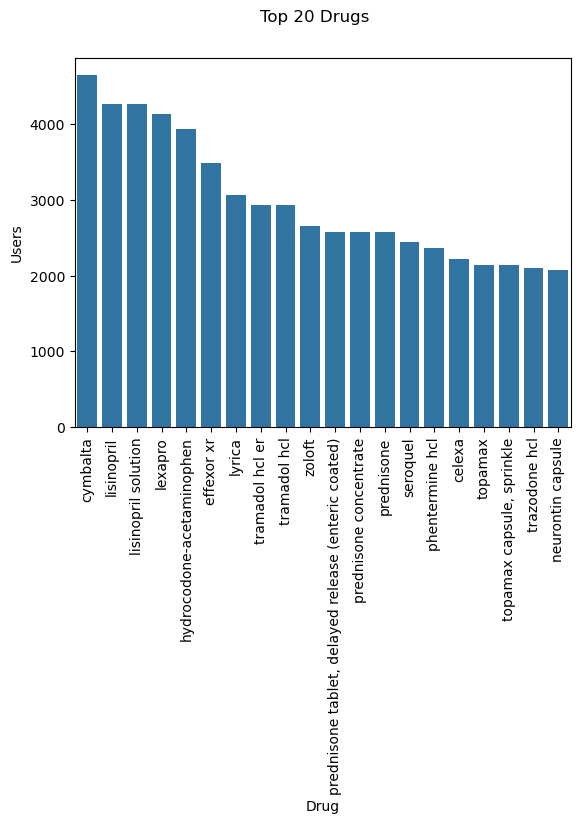

In [227]:
data1= data['Drug'].value_counts().head(20).reset_index()
data1.columns = ['Drug', 'Users']
sns.barplot(data=data1, x = 'Drug', y = 'Users')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

### Of over 7000 drugs, twenty features here each with minimum users above 2250. Of all, Cymbalta leads the pack with the maximum number of users. 

## 2. Top 20 Conditions

Text(0, 0.5, 'Users')

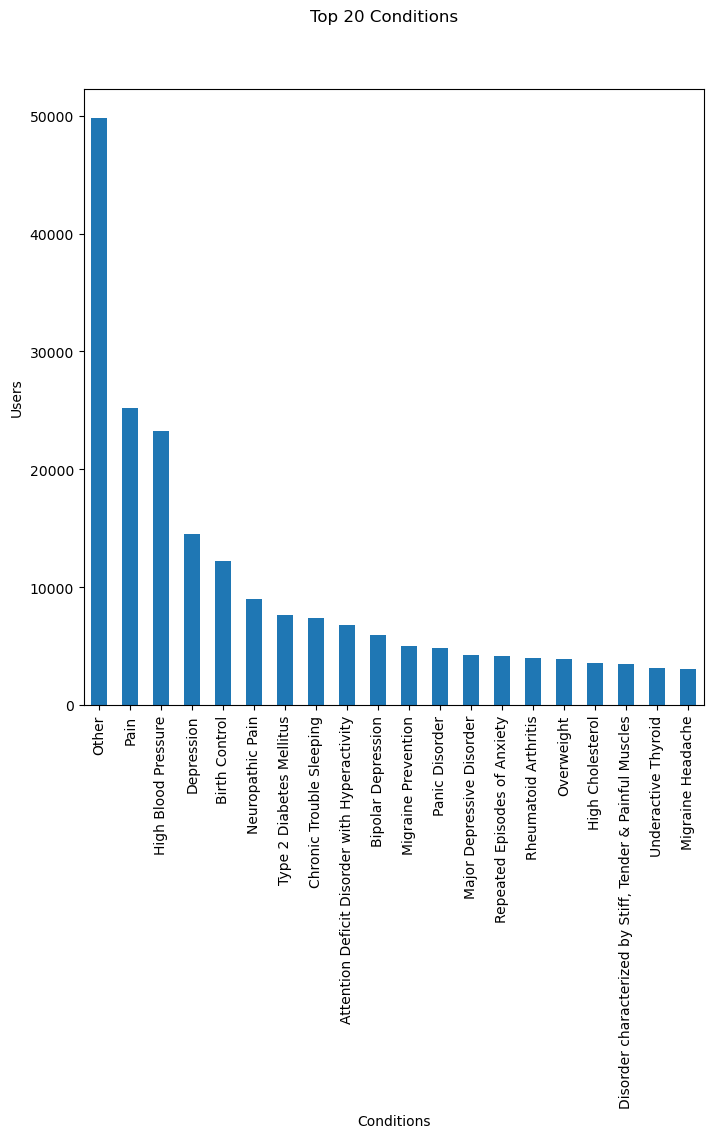

In [235]:
data['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,8))
plt.suptitle("Top 20 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

### Of 1806 Conditions, Other Conditions tops the chart followed respectively by Pain and High Blood Pressure.



### The above being interpretation of the generic data, in line with the objective of project, will move ahead selecting a particular drug Topamax, one featuring in the top 20.


## 3. Conditions - Topamax

Text(0, 0.5, 'Count')

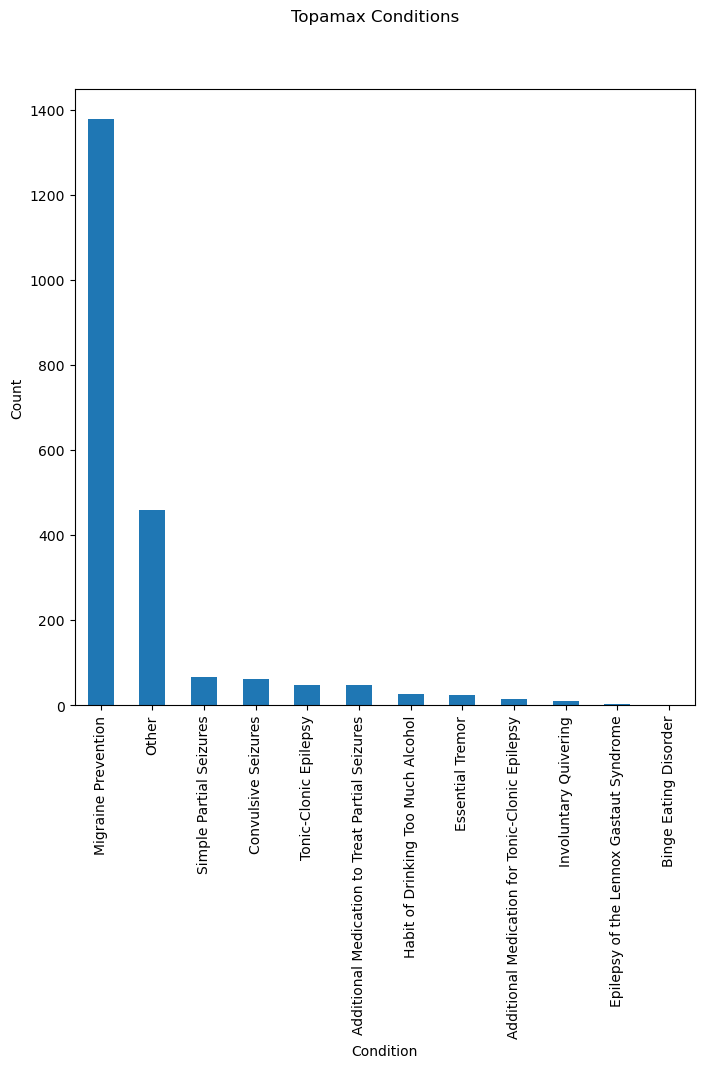

In [242]:
drug_topamax['Condition'].value_counts().nlargest(12).plot(kind='bar',figsize=(8,8))
plt.suptitle("Topamax Conditions")
plt.xlabel('Condition')
plt.ylabel('Count')


### Topamax is used in the treatment of 12 conditions. Maximum users consume the drug for migraine prevention.

## 4. Users by Gender - Topamax

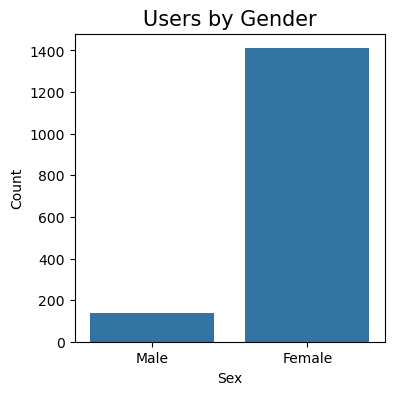

In [249]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex', data=data_copy)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count') 
plt.show()

### Female count stands more than male count.

## 5. Users by Race - Topamax

Text(0, 0.5, 'Count')

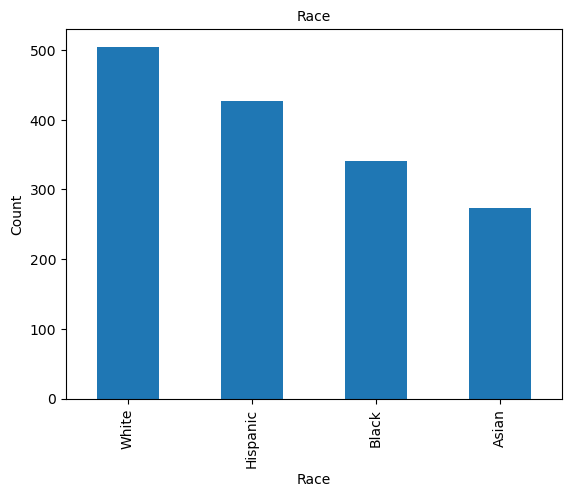

In [258]:
data_copy['Race'].value_counts().plot(kind='bar')
plt.title("Race", fontsize = 10)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

### By race, Whites topped in the usage of drugs.

## 6. Users by Race and Gender

Text(0.5, 1.0, 'Users by Race and Gender')

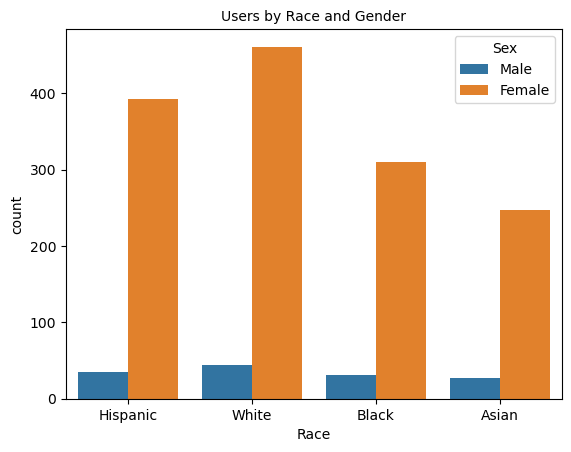

In [261]:
sns.countplot(x='Race',hue='Sex',data=data_copy)
plt.title("Users by Race and Gender", fontsize = 10)

### Female users dominated across race, each substantially.

## 7. Users by Age and Gender

Text(0.5, 1.0, 'Users by Age and Gender')

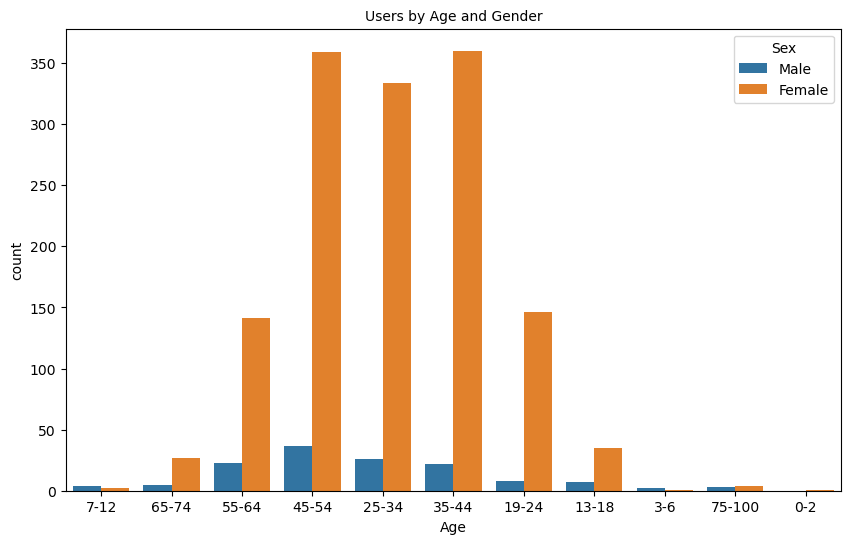

In [265]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=data_copy)
plt.title("Users by Age and Gender", fontsize = 10)

### Domination of female users consistent across age groups above 12 and below 75 years. Plus, people in the age groups 35 to 44, 45 to 54 and 25 to 34 accounted for maximum usage of Topamax.

## 8. Correlation Heatmap

<Axes: >

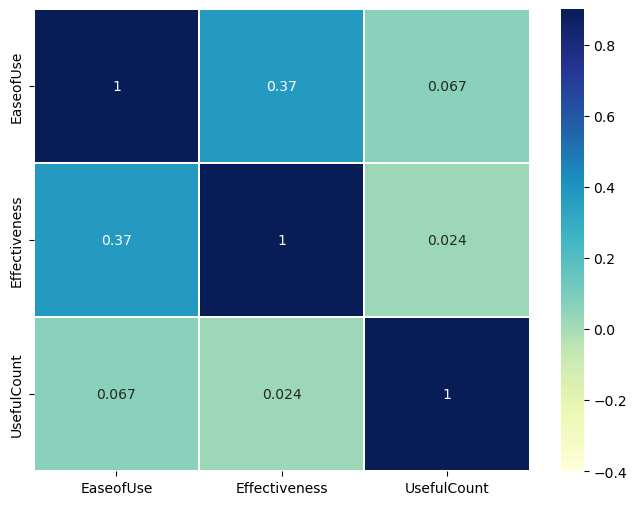

In [273]:
corrmatrix = data_copy.select_dtypes(include=['number']).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

### Correlation is used to find relationship between variables. Here, variables are weakly or moderately correlated to each other. 

## 9. Yearly Reviews - Topamax

In [280]:
data_copy['Date'] = pd.to_datetime(data_copy['Date'], errors = 'coerce')

In [282]:
# Extract year from the Date column
data_copy['Year'] = data_copy['Date'].dt.year

# Drop missing years if any
data_copy = data_copy.dropna(subset=['Year'])

# Ensure Year is integer (avoid float dtype issues)
data_copy['Year'] = data_copy['Year'].astype(int)


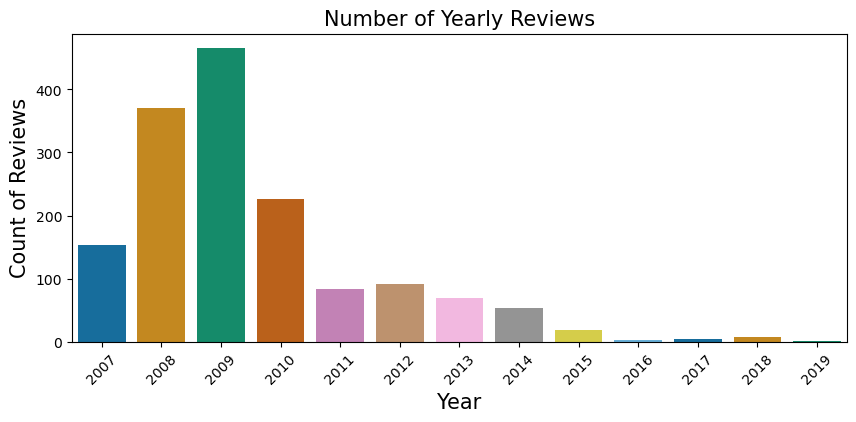

In [284]:
# Plot countplot with sorted order
plt.figure(figsize=(10,4))
sns.countplot(data=data_copy, x='Year', palette='colorblind', order=sorted(data_copy['Year'].unique()))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Number of Yearly Reviews', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count of Reviews', fontsize=15)
plt.show()

### Topamax’s yearly reviews peaked in 2009 and tapered thereafter.

## 10. Effectiveness

Text(0, 0.5, 'Count')

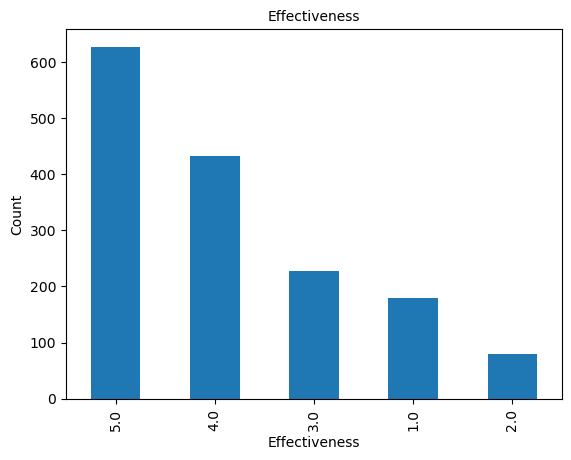

In [290]:
data_copy['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

### Most users found Topamax as highly effective.

## 11. Ease of Use

Text(0, 0.5, 'Count')

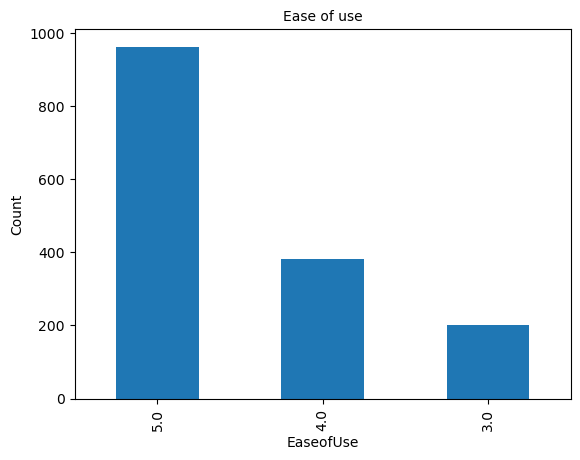

In [293]:
data_copy['EaseofUse'].value_counts().plot(kind='bar')
plt.title("Ease of use", fontsize = 10)
plt.xlabel("EaseofUse", fontsize = 10)
plt.ylabel("Count", fontsize = 10)


### Most users rated Topamax highly for its ease of use.

## 12. Useful Count

Text(0, 0.5, 'Count')

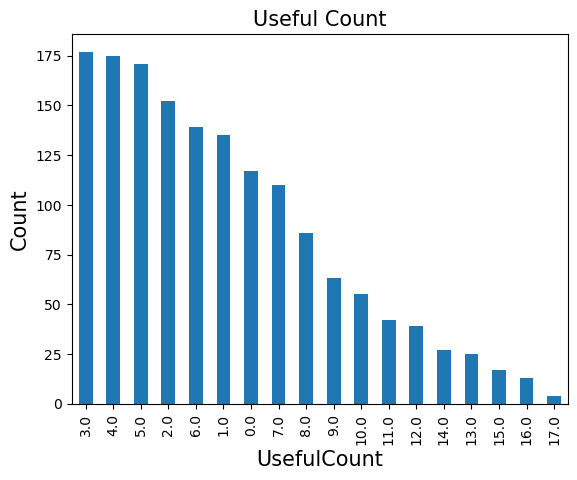

In [297]:
data_copy['UsefulCount'].value_counts().plot(kind='bar')
plt.title("Useful Count", fontsize = 15)
plt.xlabel("UsefulCount", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

### As with usefulness of reviews, Topamax users throw a mixed bag with most not finding the reviews beneficial.

## 13. Users by Effectiveness and Gender

<Figure size 1000x800 with 0 Axes>

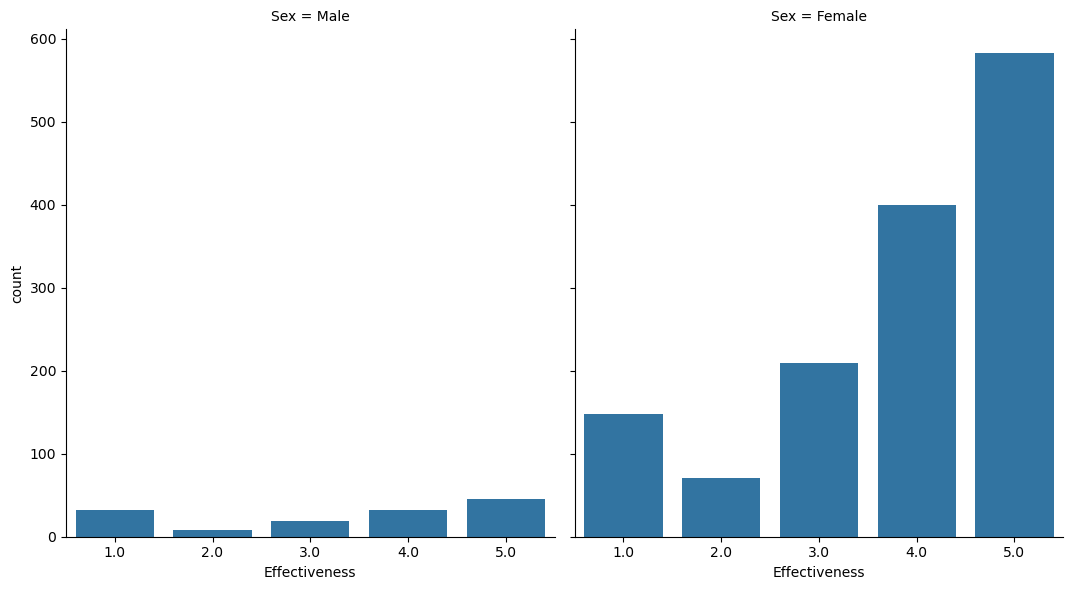

In [300]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=data_copy, kind="count",
                height=6,aspect =.9);


### Topamax is found to be highly effective in females. 

## 14. Side Effects

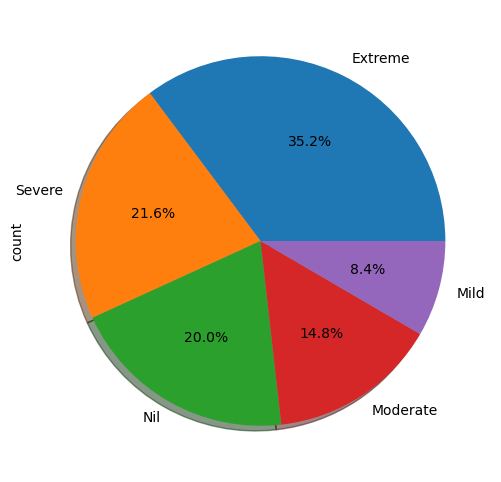

In [303]:

plt.figure(figsize=(6,6))
data_copy['SideEffects'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

### Extremely Severe Side Effects accounted for the most closely followed by No Side Effects. Mild symptoms accounted for the least.

## 15. Side Effects and Age

<Axes: xlabel='Age', ylabel='count'>

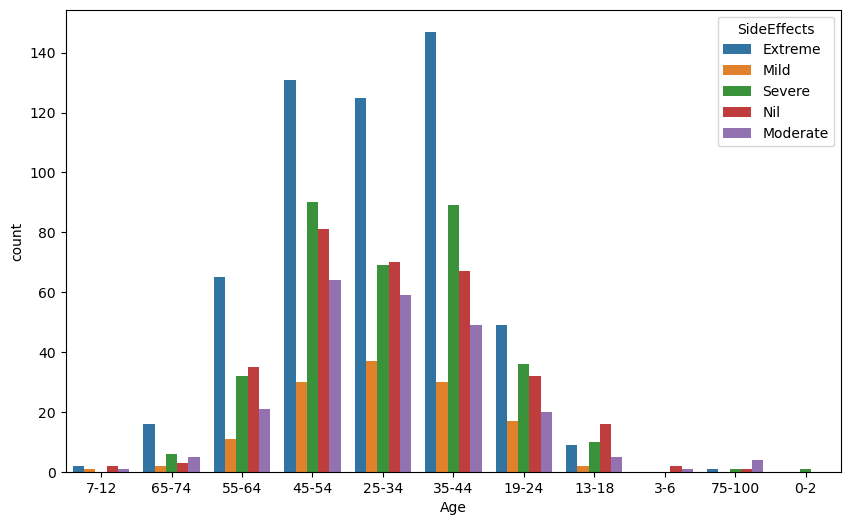

In [307]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='SideEffects',data=data_copy)

### No side effects topped in the age groups under 24. Extremely severe side effects topped in the age groups 35-44, 25-34, 45-54, 65-74 and 55-64. 

## 16. Side Effects and Gender

<Figure size 2000x1000 with 0 Axes>

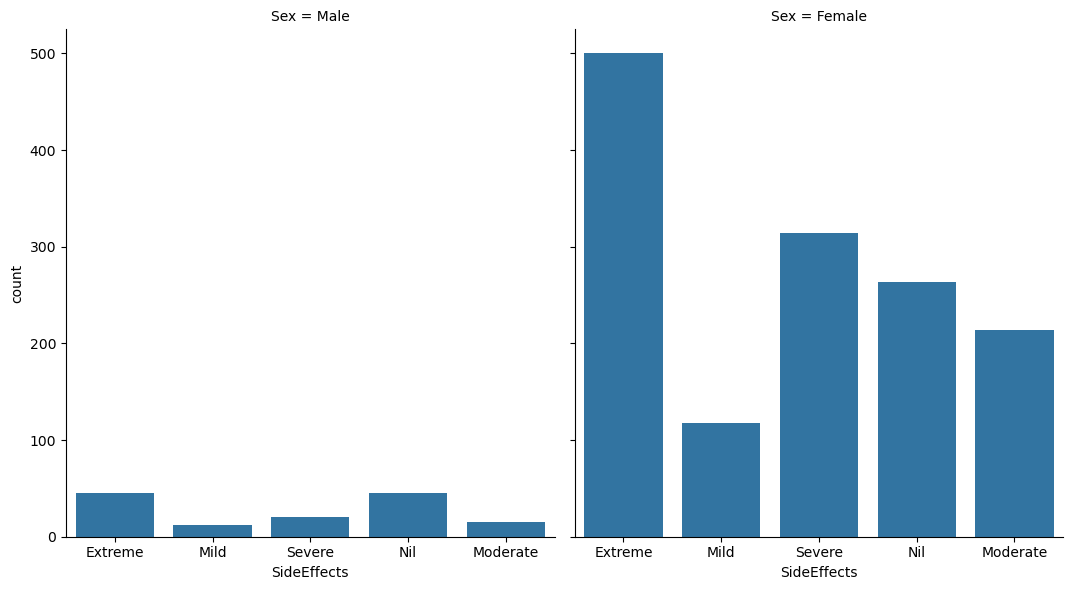

In [310]:
plt.figure(figsize=(20,10))

g = sns.catplot(x="SideEffects",col="Sex",data=data_copy, kind="count",height=6,aspect =.9);

### Side effects proved extreme in females. No side effects topped amoung men. 

## 17. Side Effects and Race

<Axes: xlabel='Race', ylabel='count'>

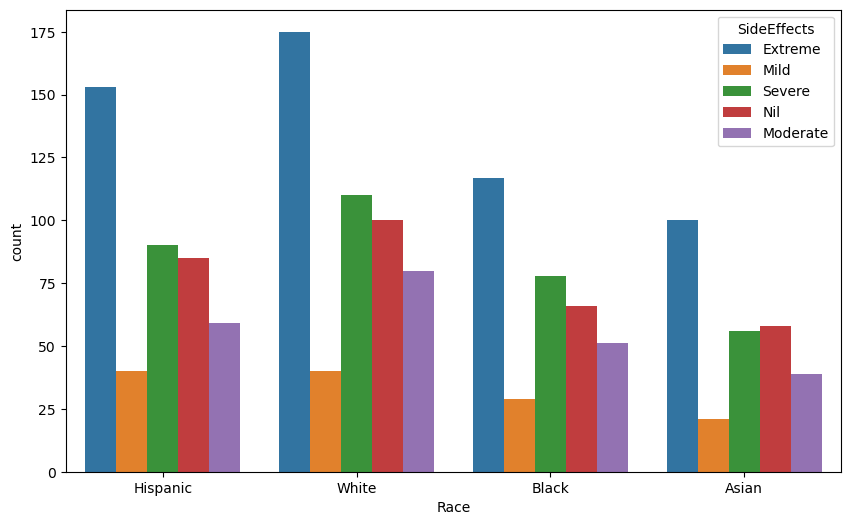

In [313]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='SideEffects',data=data_copy)

### Side effects proved race neutral with proportionate results. 

# Splitting the data

In [317]:
#target
y = data_new['SideEffects']

In [318]:
X = data_new.drop(['SideEffects'],axis=1)

In [319]:
X.shape

(1547, 6)

# Splitting the dataset into train and test sets

In [322]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2)#assigninng values

In [323]:
X_train.shape

(1237, 6)

In [324]:
X_test.shape

(310, 6)

In [325]:
y_train.shape

(1237,)

In [326]:
y_test.shape

(310,)

# Modelling

## 1. Logistic Regression Model

In [329]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(multi_class='multinomial')
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

In [331]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score,classification_report

### Performance Evaluation

In [333]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)


Accuracy is :  55.16129032258065


### Confusion Matrix of Logistic Regression Model

In [336]:
confusion_matrix(y_test,y_pred)

array([[90,  0,  0,  1, 17],
       [ 1,  0,  3, 17,  5],
       [10,  0,  5, 21, 17],
       [ 7,  0,  4, 44,  8],
       [15,  0,  5,  8, 32]], dtype=int64)

## 2. KNN Model

In [338]:
from sklearn.neighbors import KNeighborsClassifier

In [339]:
acc_values = []
neighbors = np.arange(3,15)

# creating a loop to create KNN model for each K value
for k in neighbors:
#taking the instance of KNN to a variable.the variable name is classifier.
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski')    #no: of neighbors n the methode to measure the distance .instance is created
#we have to create the model.
    classifier = KNeighborsClassifier(n_neighbors= k)
    classifier.fit(X_train,y_train)
#have to predict output using this model.
    y_pred = classifier.predict(X_test)#KNN is created
#append the accurcy values to empty list in order to fing out maximum accuracy.
    acc = accuracy_score(y_test, y_pred)#taking accuracy values to variable acc 
#append these accuracy values to our list
    acc_values.append(acc)

In [340]:
acc_values

[0.4838709677419355,
 0.535483870967742,
 0.5064516129032258,
 0.5387096774193548,
 0.5290322580645161,
 0.535483870967742,
 0.5387096774193548,
 0.5580645161290323,
 0.5516129032258065,
 0.5645161290322581,
 0.5516129032258065,
 0.532258064516129]

### To find which k value got the highest accuracy,  plotted a graph between neighbor values (i.e. k values) and accuracy values

Text(0, 0.5, 'accuracy')

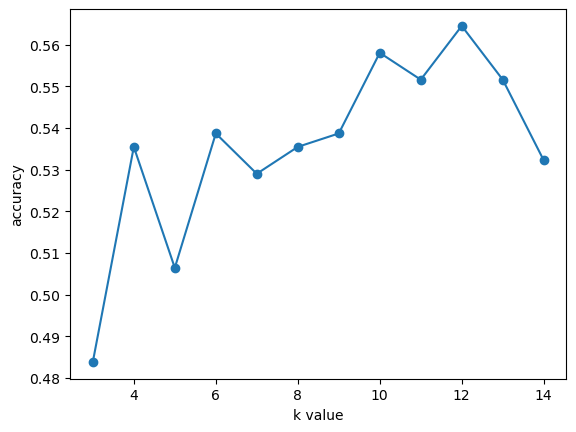

In [343]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

### KNN model with k=14

In [345]:
classifier = KNeighborsClassifier(n_neighbors= 14, metric = 'minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

### Performance Evaluation

In [347]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  53.2258064516129


### Confusion Matrix for KNN Classifier

In [349]:
confusion_matrix(y_test,y_pred)

array([[97,  0,  0,  1, 10],
       [ 2,  2,  6, 10,  6],
       [10,  0,  8,  8, 27],
       [ 9,  4,  5, 30, 15],
       [20,  2, 10,  0, 28]], dtype=int64)

## 3. Decision Tree Classifier

In [351]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

### Performance Evaluation

In [354]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  54.516129032258064


### Confusion Matrix of Decision Tree Model

In [356]:
confusion_matrix(y_test,y_pred)

array([[89,  1,  3,  2, 13],
       [ 1,  5,  9,  6,  5],
       [12,  6, 15,  8, 12],
       [ 6, 10,  7, 33,  7],
       [15,  7,  6,  5, 27]], dtype=int64)

## 4. Support Vector Machine

## a. Linear SVM

In [361]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')#creating an instance
svm_linear.fit(X_train,y_train)
y_pred = svm_linear.predict(X_test)

### Performance Evaluation

In [363]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  59.03225806451613


### Confusion Matrix of Linear SVM Model

In [366]:
confusion_matrix(y_test,y_pred)

array([[88,  1,  0,  0, 19],
       [ 1,  4,  6, 10,  5],
       [ 7,  0, 20,  8, 18],
       [ 6,  2,  9, 37,  9],
       [14,  0, 10,  2, 34]], dtype=int64)

## b. Polynomial SVM

In [368]:
svm_poly = SVC(kernel = 'poly', degree=3)
svm_poly.fit(X_train,y_train)
y_pred = svm_poly.predict(X_test)

### Performance Evaluation

In [371]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  54.516129032258064


### Confusion Matrix of Polynomial SVM

In [373]:
confusion_matrix(y_test,y_pred)

array([[88,  1,  0,  0, 19],
       [ 1,  0,  6, 11,  8],
       [ 9,  0, 13, 11, 20],
       [ 8,  0,  7, 31, 17],
       [16,  0,  4,  3, 37]], dtype=int64)

## c. Radial SVM

In [376]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)
y_pred=svm_radial.predict(X_test)

### Performance Evaluation

In [378]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  54.83870967741935


### Confusion Matrix

In [380]:
confusion_matrix(y_test,y_pred)

array([[94,  0,  0,  0, 14],
       [ 1,  0,  3, 10, 12],
       [10,  0,  6,  5, 32],
       [ 7,  0,  6, 33, 17],
       [19,  0,  3,  1, 37]], dtype=int64)

## 5. Random Forest

In [383]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
#training the model
rf.fit(X_train,y_train)
#to make predictions
y_pred=rf.predict(X_test)

### Performance Evaluation

In [385]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  55.16129032258065


### Confusion Matrix

In [387]:
confusion_matrix(y_test,y_pred)

array([[87,  0,  2,  2, 17],
       [ 1,  1,  7,  9,  8],
       [10,  3, 20,  7, 13],
       [ 6,  7,  7, 31, 12],
       [13,  3,  5,  7, 32]], dtype=int64)

## Feature Importance

In [389]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100

Effectiveness    43.944626
Age              18.461219
Condition        12.347150
Race             12.298673
EaseofUse        10.708491
Sex               2.239842
dtype: float64

## Fine tuning of hyper parameters

In [391]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [393]:
# creating another instance of random forest classifier with some changes in hyperparameter
rft= RandomForestClassifier(bootstrap=True, n_estimators=1000,max_depth=8,random_state =42,criterion='entropy')

In [394]:
rft.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=1000,
                       random_state=42)

In [395]:
y_pred=rft.predict(X_test)

In [396]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  59.03225806451613


## 6. Gradient Boosting 

In [399]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

### Performance Evaluation

In [401]:
print('Accuracy is: ',accuracy_score(y_test,y_pred)*100)

Accuracy is:  57.096774193548384


### Confusion Matrix

In [403]:
confusion_matrix(y_test,y_pred)

array([[89,  1,  0,  0, 18],
       [ 1,  3,  8,  9,  5],
       [ 8,  4, 17,  6, 18],
       [ 6,  6, 10, 32,  9],
       [12,  1,  6,  5, 36]], dtype=int64)

### 7. Extreme Gradient Boosting

In [406]:
from xgboost import XGBClassifier
#creating an instance
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred= xgb.predict(X_test)

### Performance Evaluation

In [408]:
print('Accuracy is: ',accuracy_score(y_test,y_pred)*100)

Accuracy is:  57.41935483870968


### Confusion Matrix

In [410]:
confusion_matrix(y_test,y_pred)

array([[89,  0,  3,  1, 15],
       [ 1,  2, 10,  8,  5],
       [12,  4, 17,  6, 14],
       [ 6,  4,  9, 34, 10],
       [12,  3,  3,  6, 36]], dtype=int64)

## Inference

Accuracies of classification models:

1. Logistic Regression - 55.16%


2. KNN Model - 53.22%


3. Decision Tree Classifier - 54.51%


4. Support Vector Machine:

   Linear SVM - 59.03%
   
   Polynomial SVM -  54.51% 
   
   Radial SVM - 54.83%
   
                         
5. Random Forest - 55.16%


     Fine-tuning Random Forest - 59.03%
   

6. Gradient Boosting - 57.09%


7. Extreme Gradient Boosting - 57.41%


## Recommendations

Based on the derived EDAs, the following are recommended with regard to the use of Topamax:
    
* The drug is safe for use by those up to 24 years (maximum nil side effects)

* Females in general are better to use the drug under a physician’s guidance given the high chances of extremely severe side effects.



## Conclusion
Performed various pre-processing steps and obtained a clean dataset for exploratory data analysis and modeling. Various visualisations were done on the dataset and selected a particular drug Topamax. Maximum users consume this drug for migraine prevention.


The best classification model was obtained by a linear support vector machine. On performance evaluation, a maximum accuracy of 59.03% was achieved.


By race, Whites topped in the usage of this drug with a higher female ratio. Domination of female users were consistent across age groups above 12 and below 75 years. Also, people in the age groups 35 to 44, 45 to 54 and 25 to 34 accounted for maximum usage of Topamax. Most users found Topamax as highly effective, especially females. Most rated it highly for its ease of use as well. Side effects of the drug proved race neutral. Genderwise, side effects proved extreme in females.